In [1]:
# matplotlib에서 한글 폰트를 설정하는 방법
import matplotlib.pyplot as plt
plt.rc("font", family="malgun gothic")

# 음수 기호 출력 방법
import matplotlib
matplotlib.rcParams["axes.unicode_minus"]=False

# 그래프를 선명하게 출력하는 방법
%config InlineBackend.figure_format = "retina"

import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 3. 데이터 셋
import pandas as pd
import numpy as np

df = pd.read_csv("./data/분류코드추가_잡코리아취업데이터.csv",encoding='EUC-KR')
# data = np.hstack([df.values[::, :]])


# df['분류코드_f'] = df['분류코드'].str.extract('(\d+)').astype(float)
# df['학점_f'] = df['학점'].str.extract('(\d+)').astype(float)
df['토익_f'] = df['토익'].str.extract('(\d+)').astype(float)
# df['외국어'] = df['외국어'].str.extract('(\d+)').astype(float)
# df['자격증'] = df['자격증'].str.extract('(\d+)').astype(float)
# df['해외경험'] = df['해외경험'].str.extract('(\d+)').astype(float)
# df['인턴'] = df['인턴'].str.extract('(\d+)').astype(float)
df['수상내역_f'] = df['수상내역'].str.extract('(\d+)').astype(float)
# df['봉사'] = df['봉사'].str.extract('(\d+)').astype(float)

df['토익_f0'] = df['토익_f'].fillna(0)
df['수상내역_f0'] = df['수상내역_f'].fillna(0)

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 22 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   회사명      900 non-null    object 
 1   분류코드     900 non-null    int64  
 2   기업분류     899 non-null    object 
 3   시기       900 non-null    object 
 4   지원분야     870 non-null    object 
 5   대학       900 non-null    object 
 6   계열       900 non-null    object 
 7   전공       790 non-null    object 
 8   학점       900 non-null    object 
 9   토익       900 non-null    object 
 10  토익스피킹    900 non-null    object 
 11  오픽       900 non-null    object 
 12  외국어      900 non-null    object 
 13  자격증      900 non-null    object 
 14  해외경험     900 non-null    object 
 15  인턴       900 non-null    object 
 16  수상내역     900 non-null    object 
 17  봉사       900 non-null    object 
 18  토익_f     503 non-null    float64
 19  수상내역_f   273 non-null    float64
 20  토익_f0    900 non-null    float64
 21  수상내역_f0  900 non

,분류코드,토익_f,수상내역_f,토익_f0,수상내역_f0
count,900.000000,503.000000,273.000000,900.000000,900.000000
mean,1.244444,882.222664,1.289377,493.064444,0.391111
std,0.602389,86.813844,0.600671,443.059778,0.678880
min,1.000000,140.000000,1.000000,0.000000,0.000000
25%,1.000000,840.000000,1.000000,0.000000,0.000000
50%,1.000000,900.000000,1.000000,790.000000,0.000000
75%,1.000000,940.000000,1.000000,901.250000,1.000000
max,3.000000,990.000000,4.000000,990.000000,4.000000


In [3]:
X=df[['토익_f0', '수상내역_f0']]
y=df['분류코드']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 22 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   회사명      900 non-null    object 
 1   분류코드     900 non-null    int64  
 2   기업분류     899 non-null    object 
 3   시기       900 non-null    object 
 4   지원분야     870 non-null    object 
 5   대학       900 non-null    object 
 6   계열       900 non-null    object 
 7   전공       790 non-null    object 
 8   학점       900 non-null    object 
 9   토익       900 non-null    object 
 10  토익스피킹    900 non-null    object 
 11  오픽       900 non-null    object 
 12  외국어      900 non-null    object 
 13  자격증      900 non-null    object 
 14  해외경험     900 non-null    object 
 15  인턴       900 non-null    object 
 16  수상내역     900 non-null    object 
 17  봉사       900 non-null    object 
 18  토익_f     503 non-null    float64
 19  수상내역_f   273 non-null    float64
 20  토익_f0    900 non-null    float64
 21  수상내역_f0  900 non

In [4]:
print("특성 크기:", X.shape)
print("타켓 크기:", y.shape)

특성 크기: (900, 2)
타켓 크기: (900,)


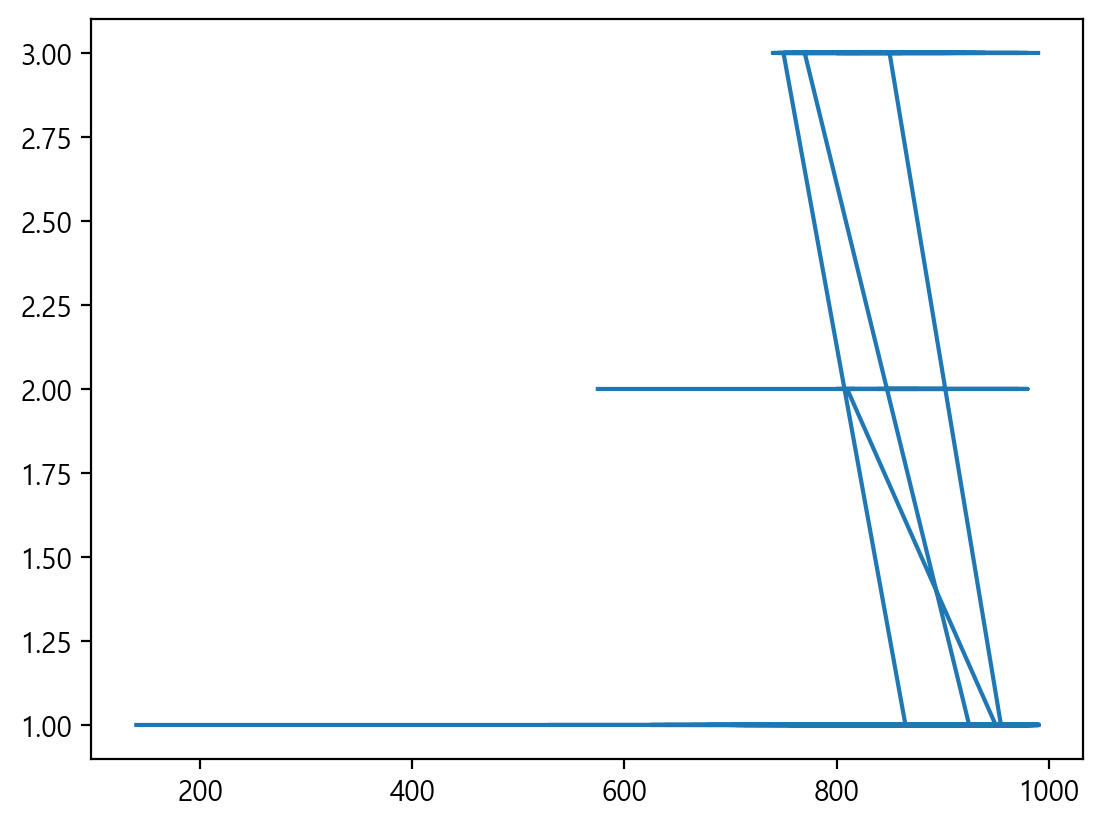

In [5]:
plt.plot(df['토익_f'], df['분류코드'])
plt.show()

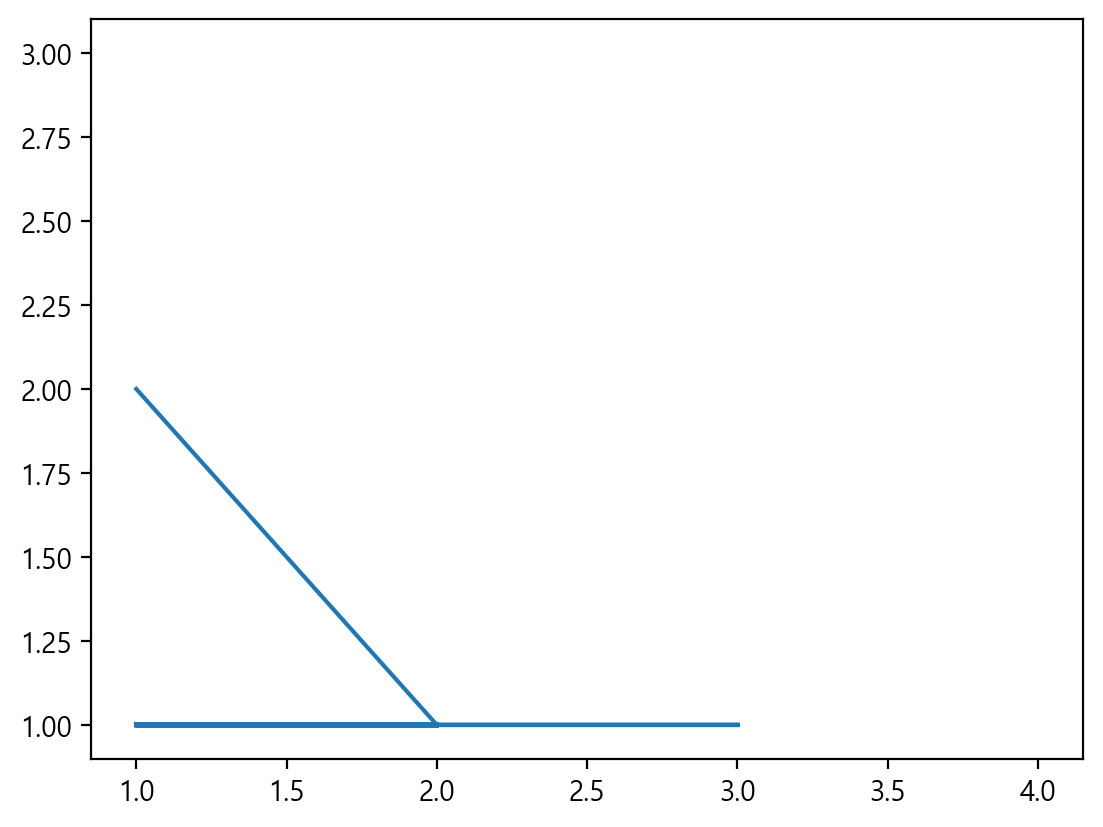

In [6]:
plt.plot(df['수상내역_f'], df['분류코드'])
plt.show()

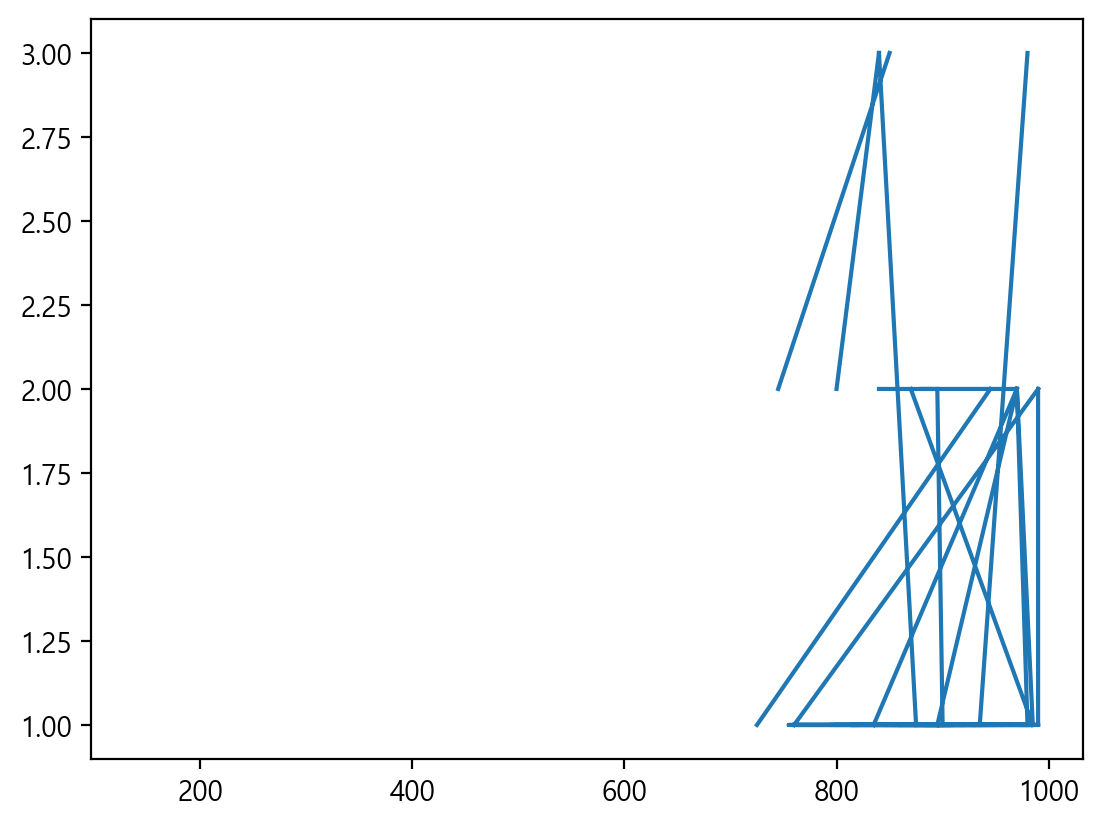

In [7]:
plt.plot(df['토익_f'], df['수상내역_f'])
plt.show()

# LogisticRegression

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# step 2. 학습 데이터와 검증 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=42)

# step 3. 모델 생성
model = LogisticRegression()


# step 4. 학습
model.fit(X_train, y_train)


# step 5. 평가
print(model.score(X_test, y_test))

0.8755555555555555


In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# 훈련 데이터의 기술통계를 확인
print('Training set description:\n', pd.DataFrame(X_train).describe())

# 훈련 데이터셋의 특성들을 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 문제에 적합한 모델(로지스틱 회귀)을 선택하고 훈련
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# 모델의 성능을 교차 검증을 통해 평가
scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
print('Cross-validation scores:', scores)

# 테스트 데이터셋에 대해 모델을 평가
y_pred = model.predict(X_test_scaled)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)

# 랜덤 포레스트 모델로도 동일한 과정을 수행
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# 랜덤 포레스트 모델의 성능을 교차 검증을 통해 평가
rf_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5)
print('Random Forest Cross-validation scores:', rf_scores)

# 테스트 데이터셋에 대해 랜덤 포레스트 모델을 평가
rf_y_pred = rf_model.predict(X_test_scaled)
rf_conf_matrix = confusion_matrix(y_test, rf_y_pred)
rf_class_report = classification_report(y_test, rf_y_pred)

print('Random Forest Confusion Matrix:\n', rf_conf_matrix)
print('Random Forest Classification Report:\n', rf_class_report)

Training set description:
             토익_f0     수상내역_f0
count  675.000000  675.000000
mean   484.160000    0.395556
std    442.049782    0.684056
min      0.000000    0.000000
25%      0.000000    0.000000
50%    770.000000    0.000000
75%    900.000000    1.000000
max    990.000000    4.000000
Cross-validation scores: [0.83703704 0.83703704 0.83703704 0.82962963 0.82962963]
Confusion Matrix:
 [[197   0   0]
 [ 14   0   0]
 [ 14   0   0]]
Classification Report:
               precision    recall  f1-score   support

           1       0.88      1.00      0.93       197
           2       0.00      0.00      0.00        14
           3       0.00      0.00      0.00        14

    accuracy                           0.88       225
   macro avg       0.29      0.33      0.31       225
weighted avg       0.77      0.88      0.82       225

Random Forest Cross-validation scores: [0.83703704 0.81481481 0.81481481 0.82962963 0.85925926]
Random Forest Confusion Matrix:
 [[193   0   4]
 [ 12  

# KNN

In [10]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# 데이터 분할 test_size=0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습 및 실행  KNeighborsClassifier (n_neighbors = 3)
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

# 예측
y_pred = knn_model.predict(X_test)

# 정확도 평가 accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8722222222222222
